In [190]:
import json
import ast
import pandas as pd
from collections import defaultdict
import time
import numpy as np

In [191]:
import scipy.stats

In [295]:
with open('buisnessoutput.txt') as json_file:
    bo = json.load(json_file)

In [330]:
x = bo['B-XT_Mf8yDJW9j6RZY3nvw'] #tstimHoMcYbkSC4eBA1wEg
print(x)

{'BikeParking': True, 'BusinessParking_garage': False, 'BusinessParking_lot': False, 'BusinessParking_street': True, 'BusinessParking_valet': False, 'BusinessParking_validated': False, 'ByAppointmentOnly': False, 'GoodForKids': True, 'OutdoorSeating': True, 'RestaurantsPriceRange2_2': True, 'WiFi_free': True, 'Leather Goods': True, 'Shopping': True, 'Home & Garden': True, 'Arts & Crafts': True, 'Event Planning & Services': True, 'Home Decor': True, 'Childrens Clothing': True, 'Arts & Entertainment': True, 'Fashion': True, 'Flowers & Gifts': True, 'Art Galleries': True, 'Coffee & Tea': True, 'Food': True, 'Jewelry': True, 'Accessories': True, 'Cards & Stationery': True}


In [444]:
# Create user to reviews to stars
# { user_id : { business_id : stars, ... }, ... }

users = {}

for review in open('yelp_dataset/review.json', 'r'):
    review_obj = json.loads(review)
    
    user = review_obj["user_id"]
    business = review_obj["business_id"]
    stars = review_obj["stars"]
    
    if user not in users:
        users[user] = {}

    users[user][business] = 0 if stars < 3 else 1

In [445]:
users

{'hG7b0MtEbXx5QzbzE6C_VA': {'ujmEBvifdJM6h6RLv4wQIg': 0,
  'xpEq8x5caXFm2lmjQ51rVQ': 0,
  'lsAe6PMRTVGtaBqw3zKlMQ': 0,
  'Y07qIurPKiUJDnTZWxZN2A': 1,
  'ucD4zt7QcZ-VspmdKS6PVw': 1,
  'eSLwC2iFJOU4UWXyuPiTpg': 0,
  'foPp-aKIZsWcsYf5zuhcNw': 0,
  '0giQuOv-hLFlVuwgw_VG9A': 0,
  'hi85yAQhKmiNmwm_jzkCRA': 0},
 'yXQM5uF2jS6es16SJzNHfg': {'NZnhc2sEQy3RmzKTZnqtwQ': 1,
  'rkQEar8WP8gNtv-OPvLD1A': 1},
 'n6-Gk65cPZL6Uz8qRm3NYw': {'WTqjgwHlXbSFevF32_DJVw': 1,
  'hk5wpV-_pi5jmDDVPeG8DA': 1,
  '30Q5xBagQHmkwp8Q9I1FCg': 1,
  'UtWngqS-WloIY_A53W5K-Q': 1,
  'dU-Nt1-LjV9mAgFOVcdAJw': 1,
  '76aGN20BrGWvAlYfPGVv_A': 1,
  'FUcwrXBb_ljg3LgTqt6F2g': 1,
  'KHqNChd0n0b_01NxcrgbQQ': 0,
  'qPyuwJoF0eEjbIC6gbdG5w': 0},
 'dacAIZ6fTM6mqwW5uxkskg': {'ikCg8xy5JIg_NGPx-MSIDA': 1,
  'aJ3HTLd-VkYvx7sFqhUcFg': 1,
  'EUKmcJ2nV6AvJPCxJyVeIw': 1,
  'QXGTj7NPbognUvAvorPDGw': 0},
 'ssoyf2_x0EQMed6fgHeMyQ': {'b1b1eb3uo-w561D0ZfCEiQ': 0,
  '1SLJKRYPRifERga33AjK7Q': 1},
 'w31MKYsNFMrjhWxxAb5wIw': {'eU_713ec6fTGNO4BegRaww': 1},
 

In [292]:
with open('allattrs.txt') as json_file:
    allattrs = json.load(json_file)
with open('allcats.txt') as json_file:
    allcats = json.load(json_file)
allca = allcats + allattrs
len(allca)
with open('allca.txt', 'w') as outfile:
    json.dump(list(sorted(allca)),outfile)

In [464]:
def vecsperuser(usr):
    vecs={}
#     print(usr)
    j = 0
    inp2 = list(users[usr].keys())
#     print(inp2)
    for bsn in inp2:
#         print ('              ',end = '\r')
#         print (round(100*i / len(inp),2),round((100*j / len(inp2)),2),end='\r')
        print (round(100*j / len(inp2),2),end='\r')
#         print(bsn)
        savesum = bo[bsn]
        newsum = {}
#         print('got here 1')
        if not len(savesum) == 0:
#             print('got here 2')
            sumset = set(sorted(savesum.keys()))
            catset = set([x for x in list(sumset) if x[:10] == 'categories'])
            resset = sumset - catset
#             print(len(savesum),'savesum',savesum)
#             print(len(catset),'catset',catset)
#             print(len(resset),'resset',resset)
            #diff = set(allattrs) - resset
            diff = set(allca) - sumset
    
#             print(len(diff),'diff')
            for differing in diff:
                newsum[differing] = False
            for res in sumset:
                newsum[res] = savesum[res]
    #         sortedkeys = sorted(list(savesum.keys()))
            if len(newsum) != 831:
                print(bsn)
                print(len(newsum),'res')
                print(sorted(list(newsum.keys())),'\n')
                print(savesum.keys(),'\n')
#             print('\n')
#             print(np.asarray(sorted(newsum.items()))[:,1])
            temp = [1 if x == "True" else 0 for x in np.asarray(sorted(newsum.items()))[:,1]]
#             print(temp)
            vecs[bsn] = temp
#         print('got here 3')
        j += 1
    return vecs

In [520]:
def findgoodinps(inp):
    vinp = vecsperuser(inp)
    vecs = np.asarray(list(vinp.values()))
    label = []
    for bsn in vinp.keys():
        users[inp]
        label.append(users[inp][bsn])

    if len(label) > 10 and not min(label) == max(label):
#         print('\r')
        return inp
#     c = LogisticRegression(random_state=0, solver='lbfgs').fit(vecs, label).coef_

In [521]:
goodinp = []
for inp in list(users.keys())[0:100]:
    goodinp.append(findgoodinps(inp))
goodinp = [x for x in goodinp if not x == None]

In [522]:
def makemodel(inp):
    vinp = vecsperuser(inp)
    vecs = np.asarray(list(vinp.values()))
    label = []
    for bsn in vinp.keys():
        users[inp]
        label.append(users[inp][bsn])
    c = LogisticRegression(random_state=0, solver='lbfgs').fit(vecs, label).coef_[0]
    top_idx = np.argsort(c)[-5:]
    top_values = [c[i] for i in top_idx]
    for idx in top_idx:
        print(list(sorted(allca))[idx],c[idx])
    return 0

In [529]:
makemodel(goodinp[2])

RestaurantsPriceRange2_2 0.36462748661655997
GoodForMeal_dessert 0.39319316609077476
OutdoorSeating 0.40432888758780694
Alcohol_full_bar 0.4226398625691103
Caters 0.88483930590087


0

In [406]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model.logistic import _logistic_regression_path
import matplotlib.pyplot as plt

In [302]:
vecs.shape

(123, 831)

In [303]:
lrcoefs , _ , _ = _logistic_regression_path(X = vecs,y = label,fit_intercept = False,solver = 'newton-cg',multi_class = 'ovr',pos_class = '3',max_iter = 1000)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:860: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = (y == pos_class)


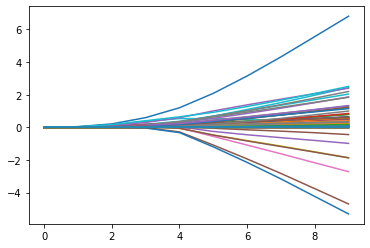

In [304]:
plt.plot(lrcoefs)
plt.show()

In [305]:
lrcoefs[-1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.65106815e-03,
        0.00000000e+00,  1.82730309e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.75863939e-01,  1.59257086e-01,  1.18910567e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.94259726e-01,  0.00000000e+00,
        0.00000000e+00,  8.98785302e-02,  0.00000000e+00,  0.00000000e+00,
        2.45977538e-05,  2.02645272e-03,  0.00000000e+00,  4.35923531e-01,
        1.63632544e-03,  4.42497397e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.65106815e-03,
        0.00000000e+00,  